In [1]:
# Importar librerías necesarias
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from scipy.stats import pearsonr

In [2]:
# Cargar datos
file_path = r'C:\Users\emisi\OneDrive\INCAE_Análisis de Datos, Innovación y Tecnología\PAIT\Nuestro Diario\Bases de Datos\Análisis de Bases de Datos\DatosNacionales.csv'
df = pd.read_csv(file_path, delimiter= ';')
df.head()

,id,fecha,day,month,year,region,titulo,subtitular,cant_notas,politica,...,publicidad,contraportada,modelo,palabras_titulo,palabras_st,envio_total,cobrable,devuelto,vendido,total_paginas
0,010222nacional,2/1/2022,Sunday,January,2022,nacional,celebracion lo lleva a la muerte,"ya no llego a darles el abrazo a sus papas, en...",4,0,...,0,modelo,1,6,13,94993,93185,11937,81248,36
1,010322nacional,3/1/2022,Monday,January,2022,nacional,campeon historico,los toros suman su primer titulo de liga nacional,5,0,...,1,deporte,1,2,9,110810,108409,6740,101669,34
2,010422nacional,4/1/2022,Tuesday,January,2022,nacional,arde ensambladora,se destruyen miles de motos en amatitlan,4,0,...,0,nacionales,1,2,7,97543,95151,8336,86815,32
3,010522nacional,5/1/2022,Wednesday,January,2022,nacional,balean albaniles,sicarios los esperaban en esquina del centro d...,3,0,...,1,modelo,1,2,10,96234,93842,14682,79160,32
4,010622nacional,6/1/2022,Thursday,January,2022,nacional,feliz dia de reyes,-,1,0,...,0,modelo,1,4,1,96254,93851,9796,84055,32


In [3]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from scipy.stats import pearsonr

# Cargar el dataset
file_path = "DatosNacionales.csv"  # Asegúrate de colocar la ruta correcta
df = pd.read_csv(file_path, delimiter=";") 

# Eliminar las variables especificadas
columns_to_exclude = ["region", "titulo", "modelo_portada", "especial", "id", "fecha", "year", "subtitular", "cobrable", "envio_total", "devuelto"]
df = df.drop(columns=columns_to_exclude, errors="ignore")

# Lista de variables categóricas que deben ser convertidas a dummies
categorical_vars = ["day", "month", "contraportada"]

# Verificar qué variables categóricas existen en el dataset
existing_categorical_vars = [col for col in categorical_vars if col in df.columns]

# Convertir variables categóricas en dummies
df = pd.get_dummies(df, columns=existing_categorical_vars, drop_first=True)

# Asegurar que todas las variables sean numéricas
df = df.apply(pd.to_numeric, errors="coerce")

# Definir las variables predictoras (X) excluyendo "vendido"
X = df.drop(columns=["vendido"])

# Variable objetivo (y)
y = df["vendido"]

# Llenar valores NaN para evitar errores en el modelo
X = X.fillna(X.median())  # Usando la mediana
y = y.fillna(y.median())  # Usando la mediana

# Convertir todas las variables a tipo float
X = X.astype(float)
y = y.astype(float)

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de diferentes profundidades para el árbol
max_depths = [5, 10, 15, 25]

# Inicializar variables para guardar los mejores resultados
best_model = None
best_r2 = -np.inf
best_rmse = float("inf")
best_depth = None

# Evaluar el modelo con diferentes profundidades
for depth in max_depths:
    print(f"\nEvaluando modelo con profundidad máxima: {depth}")
    
    # Crear y ajustar el modelo de Árbol de Decisión con la profundidad actual
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Generar predicciones con el modelo ajustado
    y_pred = model.predict(X_test)

    # Calcular el Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # Calcular el R² Score
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2}")

    # Calcular el Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Calcular el Absolute Error
    absolute_error = mean_absolute_error(y_test, y_pred)
    print(f"Absolute Error: {absolute_error}")

    # Calcular el Relative Error (Lenient)
    relative_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print(f"Relative Error (Lenient): {relative_error}%")

    # Calcular el Squared Error
    squared_error = np.mean((y_test - y_pred) ** 2)
    print(f"Squared Error: {squared_error}")

    # Calcular el Correlation Coefficient (R)
    correlation, _ = pearsonr(y_test, y_pred)
    print(f"Correlation Coefficient: {correlation}")

    # Evaluar si este modelo es mejor (por ejemplo, usando el R² o RMSE)
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_model = model
        best_depth = depth

# Mostrar el mejor modelo
print(f"\nEl mejor modelo se obtiene con una profundidad máxima de {best_depth}")
print(f"Mejor R² Score: {best_r2}")
print(f"Mejor RMSE: {best_rmse}")



Evaluando modelo con profundidad máxima: 5
Mean Squared Error (MSE): 125018183.3085192
R² Score: 0.29465897499328
Root Mean Squared Error (RMSE): 11181.153040206505
Absolute Error: 6962.709592020943
Relative Error (Lenient): 29.930761419731184%
Squared Error: 125018183.3085192
Correlation Coefficient: 0.5720026724679679

Evaluando modelo con profundidad máxima: 10
Mean Squared Error (MSE): 129579383.07520959
R² Score: 0.26892510785846147
Root Mean Squared Error (RMSE): 11383.29403447041
Absolute Error: 6537.784162263744
Relative Error (Lenient): 29.34995017130135%
Squared Error: 129579383.07520959
Correlation Coefficient: 0.6151964680248264

Evaluando modelo con profundidad máxima: 15
Mean Squared Error (MSE): 117631226.00628129
R² Score: 0.3363355047376241
Root Mean Squared Error (RMSE): 10845.7930095628
Absolute Error: 6460.00521613012
Relative Error (Lenient): 29.373625303556487%
Squared Error: 117631226.00628129
Correlation Coefficient: 0.646836246982861

Evaluando modelo con prof

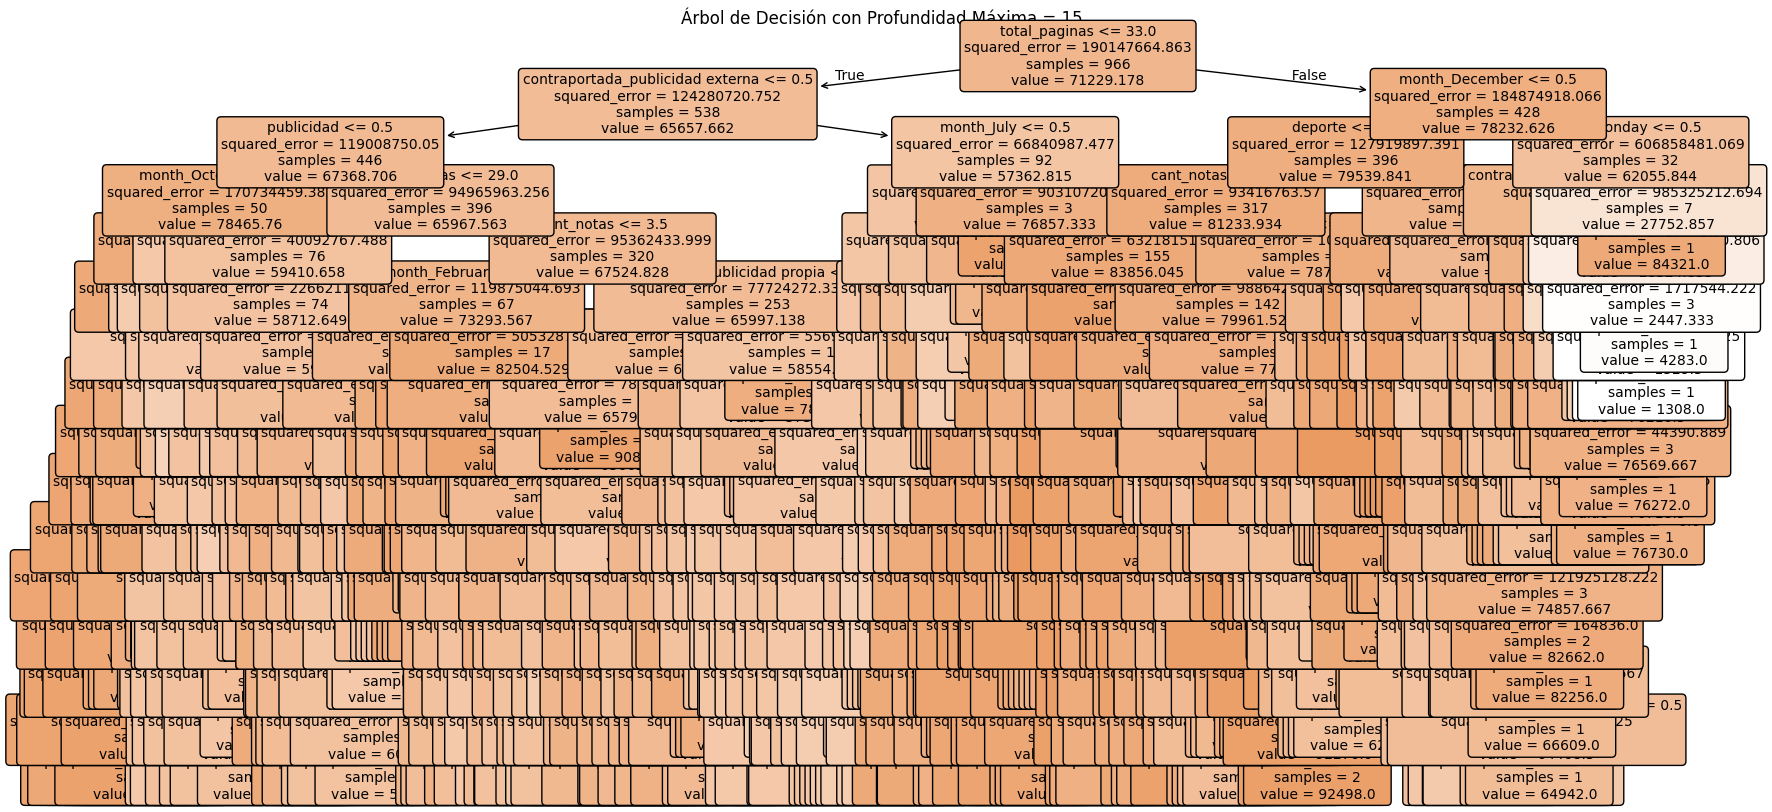

In [4]:
# Importar las librerías necesarias
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol de decisión para el mejor modelo
plt.figure(figsize=(20,10))  # Aumentar el tamaño de la figura para mayor claridad
plot_tree(best_model, 
          filled=True,            # Rellenar nodos con colores
          feature_names=X.columns,  # Nombres de las características
          class_names=['Vendidos'],  # Nombre de la variable objetivo
          rounded=True,           # Bordes redondeados en los nodos
          fontsize=10)            # Ajustar el tamaño de la fuente

plt.title(f"Árbol de Decisión con Profundidad Máxima = {best_depth}")
plt.show()

